# DSI Capstone - Kaggle Leaf Classification

Author: William Buck

---

## Problem Statement
Species identification presents many issues since it is a subjective grouping based on observations of the scientist doing the classification of the organism. Identifying the biodiversity of an ecosystem is vital to understanding how to care for the environment, which is increasingly important for humans as we explore environmental issues related to our impact. You can read more about the ["species problem" here](https://en.wikipedia.org/wiki/Species_problem).

While physical appearance is only one attribute of species identification, it is something that can be improved upon by using computers since human error can be minimized. A more accurate image classification model could have a big impact on the many companies and organizations that rely on the environment.

The following analysis on the Kaggle Leaf Classisfication datasets will demonstrate the predictive power of Machine Learning models, as well as a Convolutional Nueral Net, on the provided leaf images to identify the species of tree that the leaf originated from.


## Data Description

**[Link to Leaf Classification datasets on Kaggle](https://www.kaggle.com/c/leaf-classification/data)**

The dataset consists of 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

**File descriptions**
<br>train.csv - the training set
<br>test.csv - the test set
<br>sample_submission.csv - a sample submission file in the correct format
<br>images - the image files (each image is named with its corresponding id)

**Data fields**
<br>id - an anonymous id unique to an image
<br>margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
<br>shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
<br>texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

## Metrics
In this report, a combination of Log Loss and accuracy scores will be displayed. Since the classes are balanced and each class represents ~1% of the data, the accuracy measure will be an acceptable measure of model preformace and is quickly interpretible in terms of knowing how many correct predictions were made, but Log Loss will ultimately be the loss function I'm trying to minimize since it penalizes the score for false predictions, or less than certain predictions. See the function below.

$$
\textit{logloss} = -\frac1N\sum_{i=1}^{N}\sum_{j=1}^{M}{{y}_{i,j}\log({p}_{i,j})}
$$

N = the number of samples or instances
<br>M = the number of possible labels 
<br>${y}_{i,j}$ = a binary indicator of whether or not label *j* is the correct classification for instance *i*
<br>${p}_{i,j}$ = the model probability of assigning label *j* to instance *i*

>Log-loss is a “soft” measurement of accuracy that incorporates the idea of probabilistic confidence. It is intimately tied to information theory: log-loss is the cross entropy between the distribution of the true labels and the predictions. Intuitively speaking, entropy measures the unpredictability of something. Cross entropy incorporate the entropy of the true distribution, plus the extra unpredictability when one assumes a different distribution than the true distribution. So log-loss is an information-theoretic measure to gauge the “extra noise” that comes from using a predictor as opposed to the true labels. By minimizing the cross entropy, one maximizes the accuracy of the classifier.
><br>-- From: https://www.quora.com/What-is-an-intuitive-explanation-for-the-log-loss-function

## EDA of Attribute Vector Data and Image Data
Since the data came from Kaggle, it is already clean and ready for analysis.
1. **Training Data**:
    - 990 rows × 193 columns
    - Target is 'species'
        - There is 99 classes with 10 examples of each class, meaning each class represents 1.01% of the data.
    - all are type 'float' besides the 'species' column
    - no null values
    - Includes 'id' col
    - 0 normal features.
1. **Test Data**:
    - 594 rows × 192 columns
    - 99 classes with 6 examples of each class
1. **Image Data**:
    - All images' names correspond to the ID in the numeric attribute vector data.
    - All images are different sizes and will have to be dealt with duing vectorization.

## Data imputation
1. Normalized attribute vector data.
    - Imputed 0 values using the mean.
    - Applied BoxCox deskew with Standard Scaler  
1. PCA
1. Stratified Shuffle split for cross validation.

## Summary of Machine Learning statistical analysis
1. Chose several classifier models and applied them to the data without hyperparameter tuning.
    - RandomForest and KNN both performed well without tuning
1. Hyperparameter tuning
    - Used GridSearchCV with the scoring metric set to "neg_log_loss"
        - Also included accuracy, both were plotted for results.
1. Evaluation of Machine Learning models
    - Classification models that I chose for final evaluation all performed extremely well after tuning
        - Models: 'KNeighborsClassifier', 'GaussianNB', 'LogisticRegression', 'SVC', 'RandomForest', 'LinearDiscriminantAnalysis'
    - KNN was the clear winner in terms of log loss. Validation accuracy was 97.27% and 0.150 log loss.
    - Best in terms of accuracy was a tie between SVC and LDA with 98.48%, however those both had higher log loss values (2.29, 0.97), meaning that they were making more false positive predictions. 

## CNN with image data
1. Preformed the same data imputations as for the Machine Learning models
    - **EDIT**: Switched to adding a constant instead of imputing with the mean. This gave better scores.
        - I believe the reason for improvement is that with the CNN, changing 0 values (which are not missing and are legitimate) to the mean was distorting the numerical representation of the features. Imputing with the mean rendered more gaussian features, allowing for the machine learning models to perform better, which is why I left that method there.
1. Loaded the images provided by Kaggle as arrays.
1. Benchmarked with a simple sequential keras model with one Dense layer using only the numerical data.
    - Results showed clear signs of overfitting, but got a val_loss of 0.1888 and val_acc of 0.9461. Without tuning, this method is already performing as well as tuned Machine Learning models.
1. Adapted the a sequential model similar to VGG, to see how it would perfrom on only the image data.
    - Performance was less accurate compared to the attribute vector data, but this is to be expected early on since the attribute vector data is pre-extracted information from the images.
1. Constructed a Convolutional Nueral Net using the Keras functional API. Layers are interconnected, and after convolution and pooling, the attribute vector data is introduced before the final hidden Dense layer and softmax output layer.
1. With this model architecture, the Log Loss and accuracy are both higher than all the other attempts to model the data. 
    - Final Scores:
        - ```loss:0.07351101370107743 | acc:0.9959677419354839```

### Technical Appendix
1. [Keras Functional API Documentation](https://keras.io/models/model/)
1. [sklearn log_loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
1. [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
1. [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
1. [LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
1. [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
1. [C-Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
1. [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
1. [Box-Cox](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.boxcox.html)

In [3]:
# !pip install tensorflow
# !pip install keras

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential, Model, load_model
from keras.utils import to_categorical, plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from scipy.stats.mstats import normaltest as nt
from scipy.stats import boxcox

from PIL import Image

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Couldn't import dot_parser, loading of dot files will not be possible.
Using TensorFlow backend.


In [4]:
## some useful functions

def log_loss_gridsearch(X, y, X_test, y_test, classifer, params):
    '''Outputs a DataFrame of the CV results from GridSearchCV with Log Loss and accuracy scoring metrics'''
    a_pipe = Pipeline([
        ('PCA', PCA()), 
        ('clf', classifer),
    ])

    gscv = GridSearchCV(a_pipe, param_grid=params, cv=5, n_jobs=-1, \
                        scoring=['neg_log_loss','accuracy'], refit='neg_log_loss')
    gscv.fit(X,y)
      
    gs_df = pd.DataFrame(gscv.cv_results_).sort_values('rank_test_neg_log_loss')
    gs_df = gs_df[['rank_test_neg_log_loss',
                   'rank_test_accuracy',
                   'mean_test_neg_log_loss',
                   'mean_test_accuracy',
                   'params']].set_index('rank_test_neg_log_loss')
    
    best_ll_sort = gs_df.iloc[0]
    best_acc_sort = gs_df.sort_values('rank_test_accuracy').iloc[0]
    
    ll_score = best_ll_sort[1]
    acc_score = best_acc_sort[2]
    
    ll_best_params = best_ll_sort[3]
    acc_best_params = best_acc_sort[3]
    
    test_score = gscv.score(X_test, y_test)
    
    print(f'LL Score for Test Data:{-test_score}\n')

    print(f'Best CV Log Loss Params:{ll_best_params}')
    print(f'LL Score:{-ll_score} | Acc Score:{best_ll_sort[2]}\n')#.format(ll_score, best_ll_sort[2]))
    
    print(f'Best CV Accuracy Params:{acc_best_params}')
    print(f'LL Score:{-best_acc_sort[1]} | Acc Score:{acc_score}')#.format(acc_score, best_acc_sort[2]))

    return gs_df, ll_best_params, acc_best_params, test_score


def encoder(train):
    '''organizes data for use in the models'''
    le = LabelEncoder()
    labels = le.fit_transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    train = train.drop('species', axis=1)      
    return train, labels, classes

def load_image_as_array(ids, target_size = (64, 64)):  
    '''Converts images to arrays'''
    # Loading image
    img_path = f'./images/{ids}.jpg'
    img = image.load_img(img_path, grayscale=True)
    
    # Making all images that are a consistent size
    # Just using img.resize (instead of .thumbnail) will distorts the image since the images are not 
    # square or consistent.   
    img.thumbnail(target_size)         # resizes to no longer than the target size
    bg = Image.new('L', target_size)   # creates a new blank image of the correct shape and mode='L'
                                       # 'L' is 8-bit pixels, black and white
    
    # This is to center the actual leaf image in the blank image created above. Since some images are tall 
    # and some are wide, they will not be aligned without this block of code.
    # The tuple provided in the .paste is for the coordinates of the upper left corner of the image being pasted.
    bg.paste(
        img, (int((target_size[0] - img.size[0]) / 2), int((target_size[1] - img.size[1]) / 2))
    )  
    
    # Converting image to array
    img_arr = image.img_to_array(bg)
    
    return img_arr

def plot_history(history):
    '''Plots the history of a keras model. Two plots will be produced for accuracy and Log Loss'''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    fig, axes = plt.subplots(2,1, figsize=(10,8)) 
    
    ax1 = axes[0]
    ax1.plot(epochs, acc, 'b', label='Training acc')
    ax1.plot(epochs, val_acc, 'g--', label='Validation acc')
    ax1.set_title('Training and validation accuracy')
    ax1.legend()
    
    ax2 = axes[1] 
    ax2.plot(epochs, loss, 'b', label='Training loss')
    ax2.plot(epochs, val_loss, 'g--', label='Validation loss')
    ax2.set_title('Training and validation loss')
    ax2.legend()
    
    return fig

### EDA of Attribute Vector Data

In [635]:
data = pd.read_csv('data/train.csv', index_col='id')
test_data = pd.read_csv('data/test.csv', index_col='id')

In [636]:
# Showing a random sampling of the attribute vector data.
data.T.sample(20).T.sample(20)

,margin46,texture53,shape28,margin5,shape27,texture40,shape55,margin24,texture43,texture31,shape53,margin15,shape10,shape25,margin55,texture21,texture12,texture64,margin62,shape33
id,,,,,,,,,,,,,,,,,,,,
304,0.015625,0,0.00049654,0.025391,0.00051821,0.000977,0.00050454,0.050781,0.007812,0.042969,0.00054654,0.033203,0.00054424,0.00055255,0.039062,0,0,0.025391,0.023438,0.0004429
143,0.042969,0.063477,0.0008417,0.044922,0.00078227,0.00293,0.00058341,0,0,0.088867,0.00050179,0.023438,0.00058685,0.00066601,0.003906,0,0,0,0,0.0010762
314,0.027344,0.020508,0.00080723,0.035156,0.00073444,0.001953,0.00063167,0.025391,0.016602,0.03418,0.00060268,0.035156,0.00043509,0.00058669,0.035156,0,0,0.026367,0,0.00085098
1273,0.013672,0.022461,0.00045049,0.011719,0.00038449,0.043945,0.00028413,0.009766,0.023438,0.005859,0.00018606,0.035156,0.00028671,0.00023401,0.027344,0,0.009766,0.023438,0.046875,0.00052742
652,0.035156,0.008789,0.00055333,0.056641,0.00062134,0.024414,0.00053068,0.009766,0.004883,0.018555,0.000507,0.025391,0.0004966,0.00063906,0.021484,0,0.16992,0.006836,0.003906,0.00063382
325,0,0.000977,0.00051836,0,0.00046062,0,0.00047702,0,0.000977,0.010742,0.00049125,0.001953,0.00029904,0.00047742,0,0,0.006836,0.00293,0,0.0004168
959,0.011719,0.035156,0.00084771,0.039062,0.00078056,0.042969,0.00060283,0.015625,0.047852,0.00293,0.00048671,0.025391,0.00063453,0.0006467,0.035156,0,0,0.006836,0,0.0011601
827,0.007812,0,0.00077985,0.048828,0.0008028,0,0.00034526,0,0.000977,0.026367,0.00048595,0.001953,0.00066921,0.00075324,0,0,0.40137,0,0.007812,0.0012194
1463,0,0.000977,0.00035128,0.001953,0.00034995,0.000977,0.00044202,0,0.00293,0,0.00045263,0.001953,0.00040239,0.00047902,0,0,0.17578,0.006836,0,0.0004467


In [637]:
# Showing a description of a sample of the features
data.describe().T.sample(20)

,count,mean,std,min,25%,50%,75%,max
shape39,990.0,0.000602,0.000245,0.000062,0.000447,0.000597,0.000727,0.002106
texture41,990.0,0.015580,0.041012,0.000000,0.000000,0.000000,0.010742,0.411130
texture46,990.0,0.021760,0.026324,0.000000,0.000000,0.011719,0.035156,0.175780
texture53,990.0,0.014469,0.021654,0.000000,0.000000,0.004883,0.020264,0.165040
margin32,990.0,0.009691,0.019291,0.000000,0.000000,0.001953,0.009766,0.126950
texture54,990.0,0.022091,0.027335,0.000000,0.002930,0.012695,0.033203,0.273440
margin35,990.0,0.013167,0.013218,0.000000,0.001953,0.009766,0.021484,0.082031
shape44,990.0,0.000551,0.000321,0.000035,0.000359,0.000490,0.000637,0.002348
shape21,990.0,0.000554,0.000340,0.000056,0.000346,0.000472,0.000629,0.002190
texture19,990.0,0.024458,0.032387,0.000000,0.002930,0.013672,0.035156,0.300780


In [638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [639]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 4 to 1583
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 895.6 KB


## Machine Learning Using Attribute Vector Data
---
The following is the analysis of the attribute vector data supplied by Kaggle. These data are pre-extracted information about the images that were supplied. 

In [640]:
# Getting the training data, encoded labels, and a list of the classes
train, labels, classes = encoder(data)

In [641]:
# No features are normally distributed.
normal_test = []
for col in train.columns:
    normal_test.append(nt(train[col]))
                   #Not normal if p-value < 0.05
normal_test_bool = [0 if x[1] < 0.05 else 1 for x in normal_test]

print('Number of normal features: {}'.format(sum(normal_test_bool)))

Number of normal features: 0


### Imputing values for 0's in the data for Box-Cox deskewing

[Box-Cox deskew information](https://en.wikipedia.org/wiki/Power_transform)

In [642]:
# Impute with mean value for boxcox
imp = Imputer(0, strategy='mean', axis=1)
imp.fit(train)
imp_train = imp.transform(train)
train = pd.DataFrame(imp_train, index=train.index, columns=train.columns)

# Splitting data
train.reset_index(inplace=True)

sss = StratifiedShuffleSplit(test_size=.25)
for train_index, test_index in sss.split(train.drop('id', axis=1), labels):
    X_train, X_test = train.drop('id', axis=1).values[train_index], train.drop('id', axis=1).values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    train_ids, test_ids = (train.T[train_index].T['id']).astype('int'), (train.T[test_index].T['id']).astype('int')

X_train_df = pd.DataFrame(X_train, index=train_index, columns=train.drop('id', axis=1).columns)
X_test_df = pd.DataFrame(X_test, index=test_index, columns=train.drop('id', axis=1).columns)

# boxcox and scaling
ss = StandardScaler()
for i, col_name in enumerate(train.drop('id', axis=1).columns):  
    bc_col_train, lmbda = boxcox(X_train_df[col_name])
    bc_ss_train = ss.fit_transform(bc_col_train.reshape(-1,1))
    X_train_df[col_name] = bc_ss_train
    
    bc_col_test = boxcox(X_test_df[col_name], lmbda=lmbda)
    bs_ss_test = ss.transform(bc_col_test.reshape(-1,1))
    X_test_df[col_name] = bs_ss_test

In [643]:
# Will have 80 more normally distributed features if we use the mean
          # 67 features if we add a constant  
normal_test = []
for col in X_train_df.columns:
    normal_test.append(nt(X_train_df[col]))
                   #Not normal if p-value <= 0.05
normal_test_bool = [0 if x[1] < 0.05 else 1 for x in normal_test]

print('Number of normal features: {}'.format(sum(normal_test_bool)))

Number of normal features: 80


In [644]:
# Data description after normalization
round(X_train_df.describe())

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,...,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0,742.0
mean,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-3.0,-3.0,-2.0,-2.0,-2.0,-4.0,-5.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,...,-0.0,-0.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-0.0
50%,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,2.0,2.0,2.0,2.0,3.0,2.0,3.0,8.0,3.0,3.0,...,2.0,5.0,3.0,3.0,3.0,4.0,7.0,3.0,4.0,3.0


### Visualization of attribute vector data post processing
From the graphs, you can get a good idea of the data's distribution.

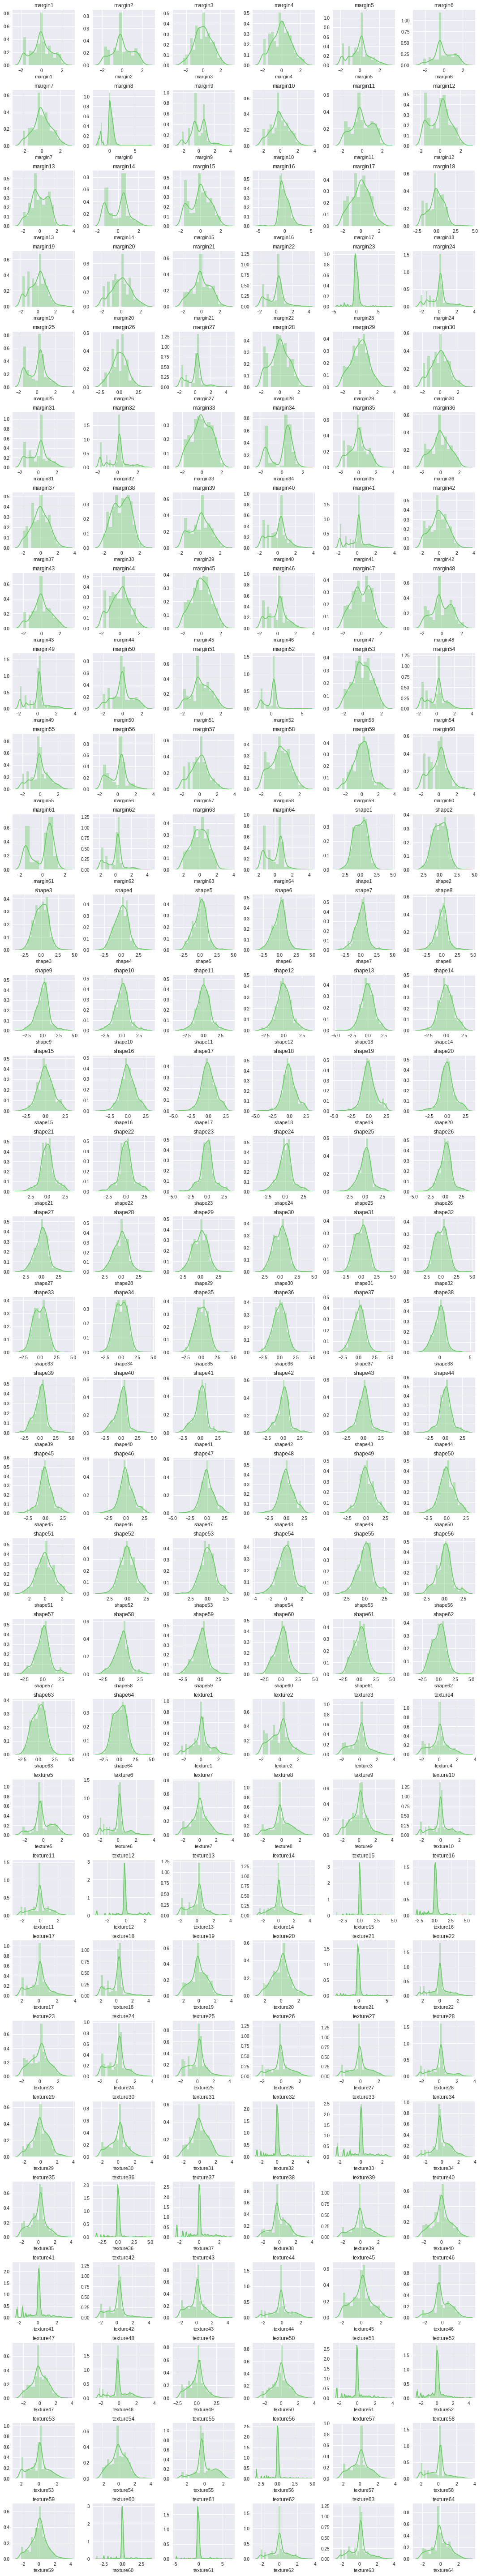

In [587]:
fig = plt.figure(figsize = (15,80))
sns.set_color_codes("muted")

for i, col_name in enumerate(X_train_df.columns):  
    i = i+1
    fig.add_subplot(32,6,i)
    sns.distplot(X_train_df[col_name], color="g")
    plt.title(col_name)
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

### Principal Component Analysis

The first 33 components explain all but 1% of the explainable variance when the features are normalized and deskewed

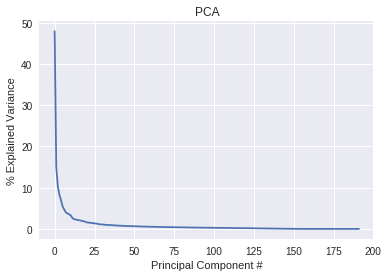

In [588]:
# Showing the explained variance 
pca = PCA()
pca.fit_transform(X_train_df, y_train)
plt.plot(pca.explained_variance_)
plt.title('PCA')
plt.xlabel('Principal Component #')
_ = plt.ylabel('% Explained Variance')

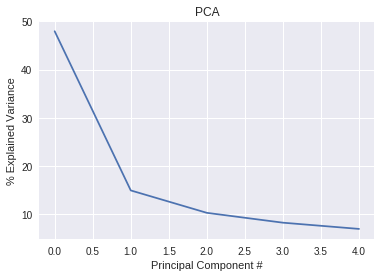

In [589]:
pca = PCA(5)
pca.fit_transform(X_train_df, y_train)
plt.plot(pca.explained_variance_)
plt.title('PCA')
plt.xlabel('Principal Component #')
_ = plt.ylabel('% Explained Variance')

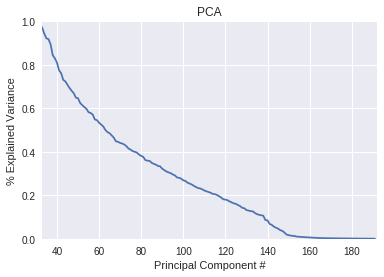

In [590]:
# Showing tail end of the PCA
pca = PCA()
pca.fit_transform(X_train_df, y_train)
plt.plot(pca.explained_variance_)
_ = plt.xlim(33,192)
_ = plt.ylim(0,1)
plt.title('PCA')
plt.xlabel('Principal Component #')
_ = plt.ylabel('% Explained Variance')

### GridSearchCV of different sklearn classifier models
The function being used (log_loss_gridsearch) is a GridSearchCV that uses neg_log_loss as the metric. 

Three things are output from the function:
1. CV results DataFrame
    - Sorted by the neg_log_loss metric, but can also be sorted by accuracy. 
    - Includes the parameters of each CV
1. Parameters for the best Log Loss score.
1. Parameters for the best accuracy score.

Also, for the best accuracy params and best Log Loss params, the corresponding Log Loss and accuracy scores for that CV split is printed out.

In [601]:
# KNeighborsClassifier
knn_params = {
    'PCA__n_components':[40,50,70,100],
    'clf__n_neighbors':[3,4,5],
    'clf__leaf_size':[2,3,4], 
    'clf__p':[1,2]
}

knn_gs_df, knn_ll_best_params, knn_acc_best_params, knn_test_score = log_loss_gridsearch(X_train_df, y_train, \
                                                                                         X_test_df, y_test, \
                                                                                         KNeighborsClassifier(), \
                                                                                         knn_params)
knn_gs_df[(knn_gs_df.index==1) | (knn_gs_df.rank_test_accuracy==1)]

LL Score for Test Data:0.2725777779229113

Best CV Log Loss Params:{'PCA__n_components': 40, 'clf__leaf_size': 4, 'clf__n_neighbors': 4, 'clf__p': 1}
LL Score:0.28423865337524895 | Acc Score:0.9487870619946092

Best CV Accuracy Params:{'PCA__n_components': 40, 'clf__leaf_size': 3, 'clf__n_neighbors': 3, 'clf__p': 2}
LL Score:0.5466895268483898 | Acc Score:0.9595687331536388


,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,41,-0.284239,0.948787,"{'PCA__n_components': 40, 'clf__leaf_size': 4,..."
8,1,-0.313850,0.959569,"{'PCA__n_components': 70, 'clf__leaf_size': 3,..."
68,1,-0.546690,0.959569,"{'PCA__n_components': 40, 'clf__leaf_size': 3,..."


In [602]:
# GaussianNB
gnb_params = {
    'PCA__n_components':np.arange(5,150,5),
}

gnb_gs_df, gnb_ll_best_params, gnb_acc_best_params, gnb_test_score = log_loss_gridsearch(X_train_df, y_train, \
                                                                                         X_test_df, y_test, \
                                                                                         GaussianNB(), \
                                                                                         gnb_params)
gnb_gs_df[(gnb_gs_df.index==1) | (gnb_gs_df.rank_test_accuracy==1)]

LL Score for Test Data:1.2029223394359478

Best CV Log Loss Params:{'PCA__n_components': 20}
LL Score:1.4333723626870183 | Acc Score:0.9016172506738545

Best CV Accuracy Params:{'PCA__n_components': 45}
LL Score:1.762276915998392 | Acc Score:0.9056603773584906


,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,4,-1.433372,0.901617,{'PCA__n_components': 20}
8,1,-1.762277,0.905660,{'PCA__n_components': 45}


In [603]:
# LogisticRegression
lr_params = {
    'PCA__n_components':[10,25,50,100],
    'clf__penalty':['l1','l2'],
    'clf__C':[.01,.1,.5]
}

lr_gs_df, lr_ll_best_params, lr_acc_best_params, lr_test_score = log_loss_gridsearch(X_train_df, y_train, \
                                                                                         X_test_df, y_test, \
                                                                                         LogisticRegression(), \
                                                                                         lr_params)
lr_gs_df[(lr_gs_df.index==1) | (lr_gs_df.rank_test_accuracy==1)]

LL Score for Test Data:0.870364661290301

Best CV Log Loss Params:{'PCA__n_components': 50, 'clf__C': 0.5, 'clf__penalty': 'l1'}
LL Score:1.0466578210241813 | Acc Score:0.9555256064690026

Best CV Accuracy Params:{'PCA__n_components': 50, 'clf__C': 0.5, 'clf__penalty': 'l2'}
LL Score:1.6035797459238406 | Acc Score:0.9690026954177897


,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,5,-1.046658,0.955526,"{'PCA__n_components': 50, 'clf__C': 0.5, 'clf_..."
5,1,-1.603580,0.969003,"{'PCA__n_components': 50, 'clf__C': 0.5, 'clf_..."


In [607]:
# SVC
svc_params = {
    'PCA__n_components':np.arange(90,120,5),
    'clf__kernel': ['linear'],
    'clf__C': [.01,.025,.1,1],
    'clf__probability':[True]
        }

svc_gs_df, svc_ll_best_params, svc_acc_best_params, svc_test_score = log_loss_gridsearch(X_train_df, y_train, \
                                                                                         X_test_df, y_test, \
                                                                                         SVC(), \
                                                                                         svc_params)
svc_gs_df[(svc_gs_df.index==1) | (svc_gs_df.rank_test_accuracy==1)]

LL Score for Test Data:2.4362773801614406

Best CV Log Loss Params:{'PCA__n_components': 115, 'clf__C': 1, 'clf__kernel': 'linear', 'clf__probability': True}
LL Score:2.594909130335251 | Acc Score:0.9811320754716981

Best CV Accuracy Params:{'PCA__n_components': 115, 'clf__C': 0.1, 'clf__kernel': 'linear', 'clf__probability': True}
LL Score:2.60746653589689 | Acc Score:0.9838274932614556


,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,6,-2.594909,0.981132,"{'PCA__n_components': 115, 'clf__C': 1, 'clf__..."
11,1,-2.607467,0.983827,"{'PCA__n_components': 115, 'clf__C': 0.1, 'clf..."


In [605]:
# RandomForest
rf_params = {
    'PCA__n_components':[22,35,100],
    'clf__criterion': ['gini'],
    'clf__max_features': [None,'auto'],
    'clf__n_estimators': [50,100,300]
        }

rf_gs_df, rf_ll_best_params, rf_acc_best_params, rf_test_score = log_loss_gridsearch(X_train_df, y_train, \
                                                                                     X_test_df, y_test, \
                                                                                     RandomForestClassifier(), \
                                                                                     rf_params)
rf_gs_df[(rf_gs_df.index==1) | (rf_gs_df.rank_test_accuracy==1)]

LL Score for Test Data:0.8964943362037022

Best CV Log Loss Params:{'PCA__n_components': 22, 'clf__criterion': 'gini', 'clf__max_features': None, 'clf__n_estimators': 100}
LL Score:1.0351282412223675 | Acc Score:0.8908355795148248

Best CV Accuracy Params:{'PCA__n_components': 100, 'clf__criterion': 'gini', 'clf__max_features': 'auto', 'clf__n_estimators': 300}
LL Score:1.6522692297493515 | Acc Score:0.9460916442048517


,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,10,-1.035128,0.890836,"{'PCA__n_components': 22, 'clf__criterion': 'g..."
16,1,-1.652269,0.946092,"{'PCA__n_components': 100, 'clf__criterion': '..."


In [606]:
# LinearDiscriminantAnalysis (which uses Bayesian probability for prediction)
lda_params = {
    'PCA__n_components':np.arange(90,150,5)
        }

lda_gs_df, lda_ll_best_params, lda_acc_best_params, lda_test_score = log_loss_gridsearch(X_train_df, y_train, \
                                                                                         X_test_df, y_test, \
                                                                                         LinearDiscriminantAnalysis(), \
                                                                                         lda_params)
lda_gs_df[(lda_gs_df.index==1) | (lda_gs_df.rank_test_accuracy==1)]

LL Score for Test Data:0.8717787260188418

Best CV Log Loss Params:{'PCA__n_components': 125}
LL Score:0.9162694578117814 | Acc Score:0.9703504043126685

Best CV Accuracy Params:{'PCA__n_components': 95}
LL Score:0.9173865470251978 | Acc Score:0.9784366576819407


,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,9,-0.916269,0.970350,{'PCA__n_components': 125}
2,1,-0.917387,0.978437,{'PCA__n_components': 95}


### Preparing data for summary statistics

In [608]:
model_names = ['KNN', 'GaussianNB', 'LogReg', 'SVC', 'RandomForest', 'LDA']
sklearn_model_dfs = [knn_gs_df, gnb_gs_df, lr_gs_df, svc_gs_df, rf_gs_df, lda_gs_df]

# best log loss score sort
blls_logloss_scores = []
blls_accuracy_scores = []

# best accuracy score sort
baccs_logloss_scores = []
baccs_accuracy_scores = []

for model in sklearn_model_dfs:
    # best log loss score sort
    blls_ll = model.iloc[0].mean_test_neg_log_loss
    blls_acc = model.iloc[0].mean_test_accuracy
    blls_logloss_scores.append(-blls_ll)
    blls_accuracy_scores.append(blls_acc*100)
    
    # best accuracy score sort
    baccs_ll = model.sort_values('rank_test_accuracy').iloc[0].mean_test_neg_log_loss
    baccs_acc = model.sort_values('rank_test_accuracy').iloc[0].mean_test_accuracy
    baccs_logloss_scores.append(-baccs_ll)
    baccs_accuracy_scores.append(baccs_acc*100)

blls_zip = zip(model_names, blls_logloss_scores, blls_accuracy_scores)
ll_sort = list(sorted(blls_zip, key=lambda x: x[1]))

baccs_zip = zip(model_names, baccs_accuracy_scores, baccs_logloss_scores)
acc_sort = list(sorted(baccs_zip, key=lambda x: x[1], reverse=True))

## Results of modeling on the attribute vector data

The two bar graphs below show the best accuracy scores and best Log Loss scores for the models. As you can see, once tuned, all of the tested models have high accuracy, but KNN is the best when looking at Log Loss

In [612]:
print('Best Log Loss Scores:')
for x in ll_sort:
    print(x)
print('---------------------------------------\nBest Accuracy Scores:')
for x in acc_sort:
    print(x)

Best Log Loss Scores:
('KNN', 0.28423865337524895, 94.878706199460922)
('LDA', 0.91626945781178137, 97.03504043126685)
('RandomForest', 1.0351282412223675, 89.08355795148249)
('LogReg', 1.0466578210241813, 95.552560646900261)
('GaussianNB', 1.4333723626870183, 90.161725067385447)
('SVC', 2.5949091303352509, 98.113207547169807)
---------------------------------------
Best Accuracy Scores:
('SVC', 98.382749326145557, 2.60746653589689)
('LDA', 97.843665768194072, 0.91738654702519784)
('LogReg', 96.900269541778968, 1.6035797459238406)
('KNN', 95.956873315363879, 0.54668952684838978)
('RandomForest', 94.609164420485172, 1.6522692297493515)
('GaussianNB', 90.566037735849065, 1.762276915998392)


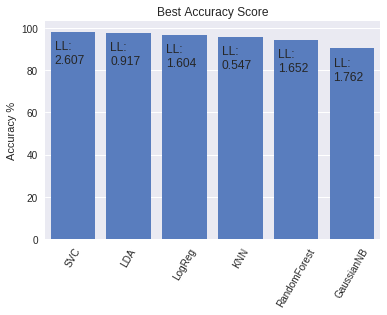

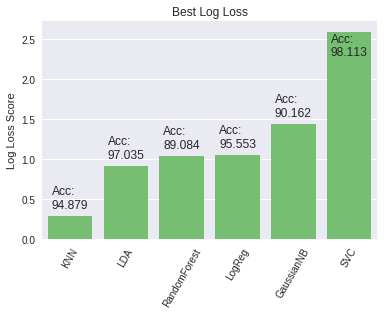

In [613]:
## Accuracy Plot
sns.set_color_codes("muted")
sns.barplot(x=[x[0] for x in acc_sort], y=[x[1] for x in acc_sort], color="b")
plt.ylabel('Accuracy %')
plt.xticks(rotation=60)
plt.title('Best Accuracy Score')

for v, sc, t in zip(range(len(model_names)), \
                    [x[1] for x in acc_sort], \
                    [round(x[2],3) for x in acc_sort]):  
    
    plt.text(v-.33, sc-15, s=f'LL:\n{t}', fontsize=12)
plt.show()


## Log Loss Plot
sns.set_color_codes("muted")
sns.barplot(x=[x[0] for x in ll_sort], y=[x[1] for x in ll_sort], color="g")
plt.ylabel('Log Loss Score')
plt.xticks(rotation=60)
plt.title('Best Log Loss')

for v, sc, t in zip(range(len(model_names)), \
                    [x[1] for x in ll_sort], \
                    [round(x[2],3) for x in ll_sort]):
    
    if v == len(model_names)-1:
        plt.text(v-.33, sc-.3, s=f'Acc:\n{t}', fontsize=12)
    else:
        plt.text(v-.33, sc+.1, s=f'Acc:\n{t}', fontsize=12)
plt.show()

### Experimenting with image arrays

In order to apply KNN to the images, each pixel was added as a feature in a DataFrame. I then performed normalization and PCA on the data prior to GridSearchCV. The result was much lower than the attribute vector data, but will provide a good benchmark for the CNN.

In [617]:
data = pd.read_csv('data/train.csv', index_col='id')
data, labels, classes = encoder(data)

# Loading all images as arrays
all_ids = data.index
all_images = list()
for i in all_ids:
    all_images.append(load_image_as_array(i))
all_images = np.array(all_images)

# Making each pixel a feature in a dataframe
all_img_attr_vecs = []
for img in all_images:
    attr_vec = []
    for row in img:
        for val in row:
            attr_vec.append(val[0]/255.)
    all_img_attr_vecs.append(attr_vec)
    
attr_vecs_df = pd.DataFrame(all_img_attr_vecs, index=data.index)
attr_vecs_df = attr_vecs_df + 1e-9
attr_vecs_df = attr_vecs_df.astype(float)

# Splitting data
attr_vecs_df.reset_index(inplace=True)
sss = StratifiedShuffleSplit(test_size=.25)
for train_index, test_index in sss.split(attr_vecs_df.drop('id', axis=1), labels):
    X_train, X_test = attr_vecs_df.drop('id', axis=1).values[train_index], attr_vecs_df.drop('id', axis=1).values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    train_ids, test_ids = (attr_vecs_df.T[train_index].T['id']).astype('int'), (attr_vecs_df.T[test_index].T['id']).astype('int')

X_train_df = pd.DataFrame(X_train, index=train_index, columns=attr_vecs_df.drop('id', axis=1).columns)
X_test_df = pd.DataFrame(X_test, index=test_index, columns=attr_vecs_df.drop('id', axis=1).columns)

# boxcox and scaling
ss = StandardScaler()
for i, col_name in enumerate(attr_vecs_df.drop('id', axis=1).columns):  
    bc_col_train, lmbda = boxcox(X_train_df[col_name])
    bc_ss_train = ss.fit_transform(bc_col_train.reshape(-1,1))
    X_train_df[col_name] = bc_ss_train
    
    bc_col_test = boxcox(X_test_df[col_name], lmbda=lmbda)
    bs_ss_test = ss.transform(bc_col_test.reshape(-1,1))
    X_test_df[col_name] = bs_ss_test

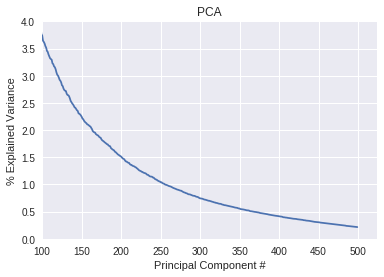

In [625]:
pca = PCA(500)
pca.fit_transform(X_train_df.values)
plt.plot(pca.explained_variance_)
plt.title('PCA')
plt.xlabel('Principal Component #')
_ = plt.ylabel('% Explained Variance')
_ = plt.ylim(ymin=0,ymax=4)
_ = plt.xlim(xmin=100)

In [628]:
knn_img_params = {
    'PCA__n_components':[200,250,300,400],
    'clf__n_neighbors':[3,5,7,9,11],
    'clf__leaf_size':[2,3,4,5], 
    'clf__p':[1,2]
}

knn_img_gs_df, knn_img_ll_best_params, knn_img_acc_best_params, knn_img_test_score = \
                                                                log_loss_gridsearch(X_train_df, y_train, \
                                                                                    X_test_df, y_test, \
                                                                                    KNeighborsClassifier(), \
                                                                                    knn_img_params)

LL Score for Test Data:7.173988235404109

Best CV Log Loss Params:{'PCA__n_components': 200, 'clf__leaf_size': 5, 'clf__n_neighbors': 11, 'clf__p': 2}
LL Score:6.912660626681246 | Acc Score:0.3557951482479784

Best CV Accuracy Params:{'PCA__n_components': 250, 'clf__leaf_size': 2, 'clf__n_neighbors': 3, 'clf__p': 2}
LL Score:11.856465322740423 | Acc Score:0.4582210242587601


In [629]:
knn_img_gs_df[(knn_img_gs_df['rank_test_accuracy']==1) | (knn_img_gs_df.index==1)]

,rank_test_accuracy,mean_test_neg_log_loss,mean_test_accuracy,params
rank_test_neg_log_loss,,,,
1,76,-6.912661,0.355795,"{'PCA__n_components': 200, 'clf__leaf_size': 5..."
65,1,-11.804700,0.458221,"{'PCA__n_components': 200, 'clf__leaf_size': 5..."
71,1,-11.856465,0.458221,"{'PCA__n_components': 250, 'clf__leaf_size': 2..."


---
## Benchmark deep learning sequential model with attribute vector data

The following Log Loss and accuracy scores where the result of evaluating the test data:

**Validation Scores:** ```loss:0.1008463901948304 | acc:0.9717741935483871```

In [658]:
# Added EarlyStopping and used a high number of neurons.
es = EarlyStopping(patience=3)
best_bench_file = "bestbenchmarkmodel.h5"
best_bench_model = ModelCheckpoint(best_bench_file, monitor='val_loss', save_best_only=True)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (n_cols,)))
model.add(Dense(99, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_df.as_matrix(), to_categorical(y_train), \
                    validation_split=.25, \
                    epochs=20, batch_size=32, \
                    callbacks=[best_bench_model])

Train on 556 samples, validate on 186 samples
Epoch 1/20
556/556 [==============================] - 9s 15ms/step - loss: 3.2421 - acc: 0.3579 - val_loss: 2.0018 - val_acc: 0.6183
Epoch 2/20
556/556 [==============================] - 0s 481us/step - loss: 0.7804 - acc: 0.9550 - val_loss: 0.9494 - val_acc: 0.8817
Epoch 3/20
556/556 [==============================] - 0s 508us/step - loss: 0.2196 - acc: 0.9928 - val_loss: 0.5315 - val_acc: 0.9409
Epoch 4/20
556/556 [==============================] - 0s 481us/step - loss: 0.0761 - acc: 0.9982 - val_loss: 0.3957 - val_acc: 0.9516
Epoch 5/20
556/556 [==============================] - 0s 481us/step - loss: 0.0375 - acc: 0.9982 - val_loss: 0.3406 - val_acc: 0.9355
Epoch 6/20
556/556 [==============================] - 0s 507us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 0.2393 - val_acc: 0.9677
Epoch 7/20
556/556 [==============================] - 0s 505us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.2077 - val_acc: 0.9570
Epoch 8/20
556/55

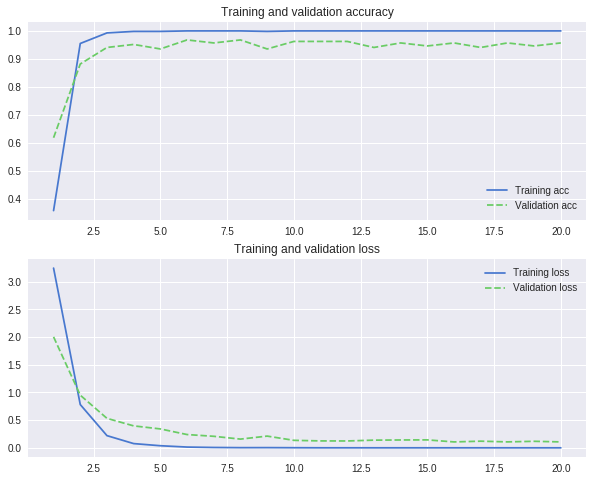

In [659]:
hist_fig = plot_history(history)

In [662]:
best_bench_model_loaded = load_model(best_bench_file)
best_bench_scores = best_bench_model_loaded.evaluate(X_test_df.as_matrix(), to_categorical(y_test), verbose=0)

print('SCORES FROM BEST MODEL\n----------------------\n{}:{}\n{}:{}'.format(\
                                               best_bench_model_loaded.metrics_names[0], best_bench_scores[0], \
                                               best_bench_model_loaded.metrics_names[1], best_bench_scores[1])) 

SCORES FROM BEST MODEL
----------------------
loss:0.1008463901948304
acc:0.9717741935483871


## Image Data Preperation

>The methods in the layers module for creating convolutional and pooling layers for two-dimensional image data expect input tensors to have a shape of [batch_size, image_width, image_height, channels], defined as follows:

> - **batch_size.** Size of the subset of examples to use when performing gradient descent during training.
> - **image_width.** Width of the example images.
> - **image_height.** Height of the example images.
> - **channels.** Number of color channels in the example images. For color images, the number of channels is 3 (red, green, blue). For monochrome images, there is just 1 channel (black).

        -- From TensorFlow documentation

In [132]:
# load the ids in the training and test datasets to make a list of all train data image arrays.
train_ids = data.index
train_images = list()
for i in train_ids:
    train_images.append(load_image_as_array(i))
train_images = np.array(train_images)

test_ids = test_data.index
test_images = list()
for i in test_ids:
    test_images.append(load_image_as_array(i))
test_images = np.array(test_images)

train_images.shape, test_images.shape

((990, 64, 64, 1), (594, 64, 64, 1))

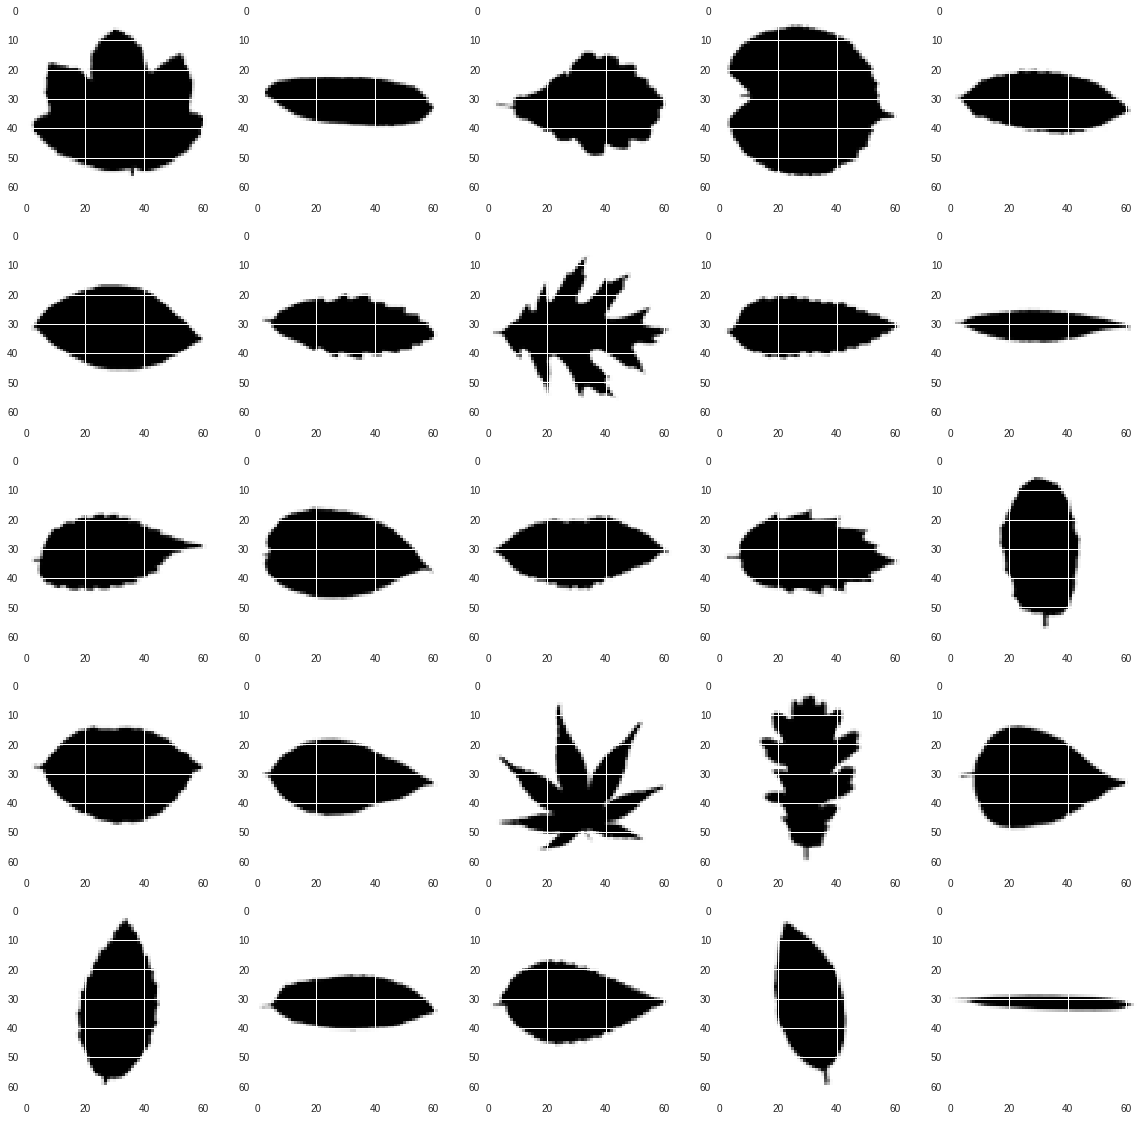

In [34]:
# Plotting a random sample of the images using the image arrays created above

fig = plt.figure(figsize=(20,20))
for r in range(25):
    fig.add_subplot(5,5,r+1)
    plt.imshow(train_images[r].squeeze())
plt.show()

### Simple example of a CNN with the image data that was converted to arrays above

>Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. CNNs contains three components:

> - **Convolutional layers**, which apply a specified number of convolution filters to the image. For each subregion, the layer performs a set of mathematical operations to produce a single value in the output feature map. Convolutional layers then typically apply a ReLU activation function to the output to introduce nonlinearities into the model.

> - **Pooling layers**, which downsample the image data extracted by the convolutional layers to reduce the dimensionality of the feature map in order to decrease processing time. A commonly used pooling algorithm is max pooling, which extracts subregions of the feature map (e.g., 2x2-pixel tiles), keeps their maximum value, and discards all other values.

> - **Dense (fully connected) layers**, which perform classification on the features extracted by the convolutional layers and downsampled by the pooling layers. In a dense layer, every node in the layer is connected to every node in the preceding layer.

>Typically, a CNN is composed of a stack of convolutional modules that perform feature extraction. Each module consists of a convolutional layer followed by a pooling layer. The last convolutional module is followed by one or more dense layers that perform classification. The final dense layer in a CNN contains a single node for each target class in the model (all the possible classes the model may predict), with a softmax activation function to generate a value between 0–1 for each node (the sum of all these softmax values is equal to 1). **We can interpret the softmax values for a given image as relative measurements of how likely it is that the image falls into each target class.**
><br>--From TensorFlow documentation https://www.tensorflow.org/tutorials/layers#pooling_layer_1


### Sequential VGG style model with the image data

[Keras documentation showing VGG architecture](https://keras.io/getting-started/sequential-model-guide/)_

In [ ]:
data = pd.read_csv('data/train.csv', index_col='id')

# Encoding target
le_y = LabelEncoder()
y_encode = le_y.fit_transform(data.species)

# Converting images to arrays
train_ids = data.index
train_images = list()
for i in train_ids:
    train_images.append(load_image_as_array(i))
train_images = np.array(train_images)

sss = StratifiedShuffleSplit(test_size=.25)
for train_index, test_index in sss.split(train_images, y_encode):
    X_train, X_test = train_images[train_index], train_images[test_index]
    y_train, y_test = y_encode[train_index], y_encode[test_index]


num_classes = 99
# convert class vectors to class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# input image dimensions
img_rows, img_cols = X_train.shape[1:3]

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Prepping matricies for model by making float values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(99, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

vgg_hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test))
score = model.evaluate(X_test, y_test, batch_size=32)

In [58]:
print(f'LL score: {score[0]}')
print(f'Acc score: {score[1]}')

LL score: 1.4094537958022086
Acc score: 0.6653225806451613


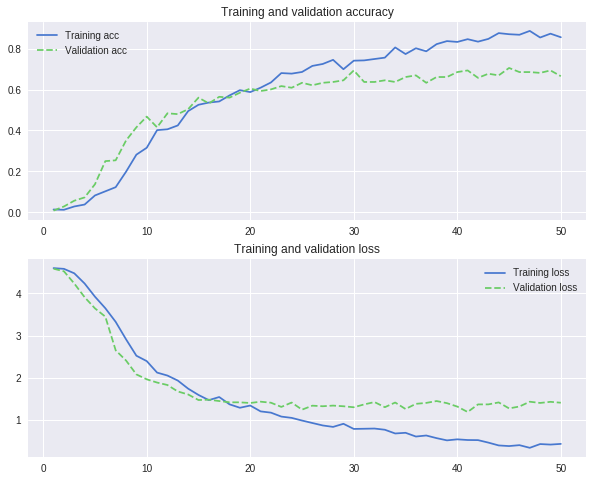

In [59]:
hist_fig = plot_history(vgg_hist)

## Results of CNN sequential model with only the extracted image data

The VGG style model started to become overfit around 30 epochs. Although the Log Loss was comparable to the results of the machine learning models applied to the attribute vector data, the accuracy maxes out around ~68%. 

## Attempt to reduce overfitting issues by using a ImageDataGenerator that rotates, flips, and normalizes the image data.

This prevented the CNN from learning effectively, and the accuracy and log loss were not competitive with other models.

Interesting note, the validation accuracy and loss are higher than the training accuracy and loss. Need to look into this further.

In [60]:
datagen = image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                    steps_per_epoch=len(X_train) / 50, epochs=60,
                    validation_data=(X_test,y_test))

Epoch 1/60
15/14 [==============================] - 10s 689ms/step - loss: 5.7787 - acc: 0.0467 - val_loss: 4.5763 - val_acc: 0.0161
Epoch 2/60
15/14 [==============================] - 11s 702ms/step - loss: 4.4462 - acc: 0.0296 - val_loss: 4.3078 - val_acc: 0.1452
Epoch 3/60
15/14 [==============================] - 11s 703ms/step - loss: 4.2606 - acc: 0.0509 - val_loss: 4.1828 - val_acc: 0.2419
Epoch 4/60
15/14 [==============================] - 11s 748ms/step - loss: 4.1057 - acc: 0.0610 - val_loss: 4.0864 - val_acc: 0.2823
Epoch 5/60
15/14 [==============================] - 11s 737ms/step - loss: 3.9710 - acc: 0.0568 - val_loss: 3.9805 - val_acc: 0.2742
Epoch 6/60
15/14 [==============================] - 12s 782ms/step - loss: 3.8903 - acc: 0.0757 - val_loss: 4.0778 - val_acc: 0.2944
Epoch 7/60
15/14 [==============================] - 12s 809ms/step - loss: 3.7596 - acc: 0.0907 - val_loss: 3.9329 - val_acc: 0.2621
Epoch 8/60
15/14 [==============================] - 11s 766ms/step - 

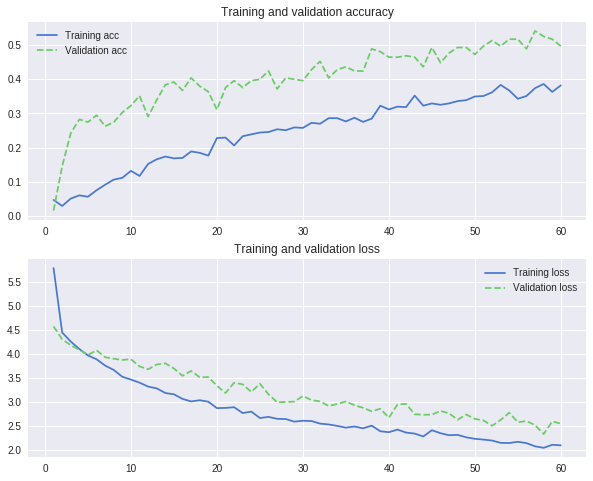

In [61]:
hist_fig = plot_history(hist)

# Functional API: CNN with image and attribute vector data

In this CNN model, the image data is introduced after convolution and pooling. This is a summary of the architecture. As you can see, the numerical input is concatenated with the output of the image related layers, right before the Dense layer.
<br>
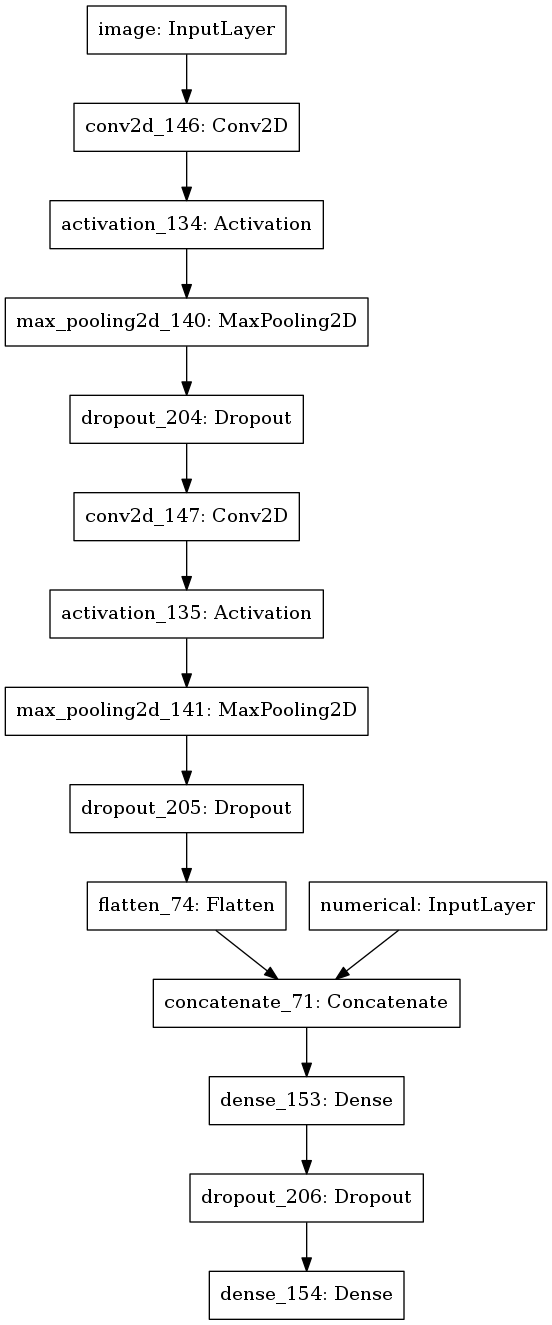

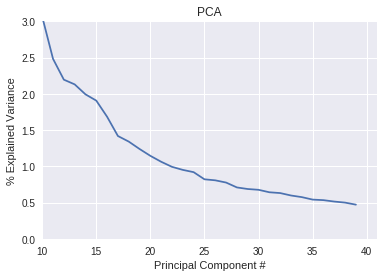

In [28]:
# Re-normalizing data
data = pd.read_csv('data/train.csv', index_col='id')
data, labels, classes = encoder(data)

# Add constant to all values for boxcox transformation
data = data + 0.000001

# Splitting data
data.reset_index(inplace=True)
sss = StratifiedShuffleSplit(test_size=.25)
for train_index, test_index in sss.split(data.drop('id', axis=1), labels):
    X_train, X_test = data.drop('id', axis=1).values[train_index], data.drop('id', axis=1).values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    train_ids, test_ids = (data.T[train_index].T['id']).astype('int'), (data.T[test_index].T['id']).astype('int')

X_train_df = pd.DataFrame(X_train, index=train_index, columns=data.drop('id', axis=1).columns)
X_test_df = pd.DataFrame(X_test, index=test_index, columns=data.drop('id', axis=1).columns)

# boxcox and scaling
ss = StandardScaler()
for i, col_name in enumerate(data.drop('id', axis=1).columns):  
    bc_col_train, lmbda = boxcox(X_train_df[col_name])
    bc_ss_train = ss.fit_transform(bc_col_train.reshape(-1,1))
    X_train_df[col_name] = bc_ss_train
    
    bc_col_test = boxcox(X_test_df[col_name], lmbda=lmbda)
    bs_ss_test = ss.transform(bc_col_test.reshape(-1,1))
    X_test_df[col_name] = bs_ss_test

# Using PCA of 40, since at that point, PCs have <.5% explained variance
pca_cm = PCA(40)
train_predictors = pca_cm.fit_transform(X_train_df)
test_predictors = pca_cm.transform(X_test_df)
n_cols = train_predictors.shape[1] 

# Showing PCA plot
plt.plot(pca_cm.explained_variance_)
_ = plt.xlim(xmin=10)
_ = plt.ylim(ymax=3, ymin=0)
plt.title('PCA')
plt.xlabel('Principal Component #')
_ = plt.ylabel('% Explained Variance')
plt.show()

In [29]:
def combined_model(activation='tanh', num_shape=(train_predictors.shape[1],)):

    # Define the image input
    image = Input(shape=(64, 64, 1), name='image')
    # First convolutional layer
    x = Conv2D(4, (3,3), input_shape=(64, 64, 1), padding='same')(image)
    x = (Activation(activation))(x)
    x = (MaxPooling2D(pool_size=(3,3)))(x)
    x = Dropout(.25)(x)

    # Second convolutional layer
    x = (Conv2D(8, (2, 2), padding='same'))(x)
    x = (Activation(activation))(x)
    x = (MaxPooling2D(pool_size=(2,2), strides=(2,2)))(x)
    x = Dropout(.5)(x)

    # Flatten our array
    x = Flatten()(x)
    # Define the pre-extracted feature input
    numerical = Input(shape=num_shape, name='numerical')
    # Concatenate the output of convnet with our pre-extracted feature input
    concatenated = concatenate([x, numerical])

    # Fully connected layer just like in a normal MLP
    x = Dense(500, activation=activation)(concatenated)
    x = Dropout(.5)(x)

    # Final output layer
    out = Dense(99, activation='softmax')(x)
    # Defining the model per the Functional API
    model = Model(inputs=[image, numerical], outputs=out)
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    return model

# Preparing X input for combined model
X_train_images = list()
for i in train_ids:
    X_train_images.append(load_image_as_array(i))
X_train_images = np.array(X_train_images)

X_test_images = list()
for i in test_ids:
    X_test_images.append(load_image_as_array(i))
X_test_images = np.array(X_test_images)

# Final input tensors
X_train_img_num = [X_train_images, train_predictors]
X_test_img_num = [X_test_images, test_predictors]

# autosave best Model
best_model_file = "bestmodel_2.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', save_best_only=True)

cm_es = EarlyStopping(patience=3)

In [30]:
combined_model = combined_model(activation='tanh')
cm_hist = combined_model.fit(X_train_img_num, to_categorical(y_train), 
                             epochs=100, 
                             validation_split=.25,
                             callbacks=[cm_es, best_model])

plot_model(best_model_loaded, to_file='model.png')
print('Loading the best model...')
best_model_loaded = load_model(best_model_file)
print('Best Model loaded.')

Train on 556 samples, validate on 186 samples
Epoch 1/100
556/556 [==============================] - 1s 2ms/step - loss: 4.4433 - acc: 0.0701 - val_loss: 3.3616 - val_acc: 0.2312
Epoch 2/100
556/556 [==============================] - 1s 1ms/step - loss: 2.6029 - acc: 0.3903 - val_loss: 2.2883 - val_acc: 0.5215
Epoch 3/100
556/556 [==============================] - 1s 1ms/step - loss: 1.4617 - acc: 0.6996 - val_loss: 1.4544 - val_acc: 0.6935
Epoch 4/100
556/556 [==============================] - 1s 1ms/step - loss: 0.8977 - acc: 0.8435 - val_loss: 0.9686 - val_acc: 0.8602
Epoch 5/100
556/556 [==============================] - 1s 1ms/step - loss: 0.6101 - acc: 0.9065 - val_loss: 0.7294 - val_acc: 0.9301
Epoch 6/100
556/556 [==============================] - 1s 1ms/step - loss: 0.4546 - acc: 0.9460 - val_loss: 0.5561 - val_acc: 0.9462
Epoch 7/100
556/556 [==============================] - 1s 1ms/step - loss: 0.3225 - acc: 0.9748 - val_loss: 0.4499 - val_acc: 0.9677
Epoch 8/100
556/556 [==

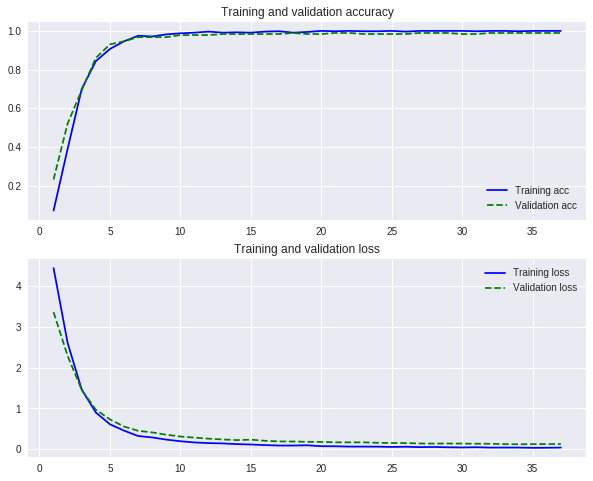

In [31]:
hist_fig = plot_history(cm_hist)

In [32]:
best_scores = best_model_loaded.evaluate(X_test_img_num, to_categorical(y_test), verbose=0)

print('SCORES FROM BEST MODEL\n----------------------\n{}:{}\n{}:{}'.format(\
                                   best_model_loaded.metrics_names[0], best_scores[0],
                                   best_model_loaded.metrics_names[1], best_scores[1])) 

SCORES FROM BEST MODEL
----------------------
loss:0.07351101370107743
acc:0.9959677419354839


# Results of CNN with image data and attribute vector data

The scores and graphs above show that the validation loss and accuracy of the combined model are far superior to the machine learning models. The final results using the test data came out to ```loss:0.07351101370107743 | acc:0.9959677419354839```.